In [20]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset (after downloading CSV from Kaggle)
df = pd.read_csv("D:/CL-1/ML/car_evaluation.csv", header=None)

# Add column names
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [22]:
# Encode categorical features
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)


In [23]:
# Split data into features and target
X = df_encoded.drop('safety', axis=1)  # features
y = df_encoded['safety']               # target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.28034682080924855

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.31      0.31       121
           1       0.36      0.35      0.35       107
           2       0.18      0.19      0.18       118

    accuracy                           0.28       346
   macro avg       0.28      0.28      0.28       346
weighted avg       0.28      0.28      0.28       346



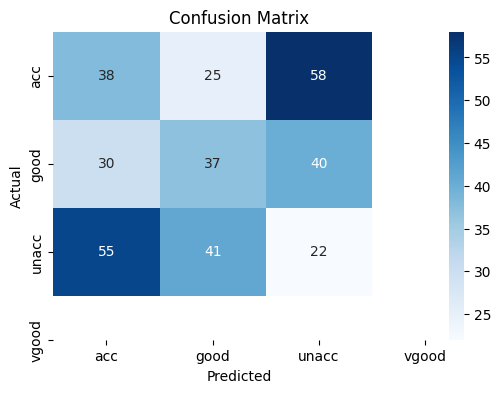

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


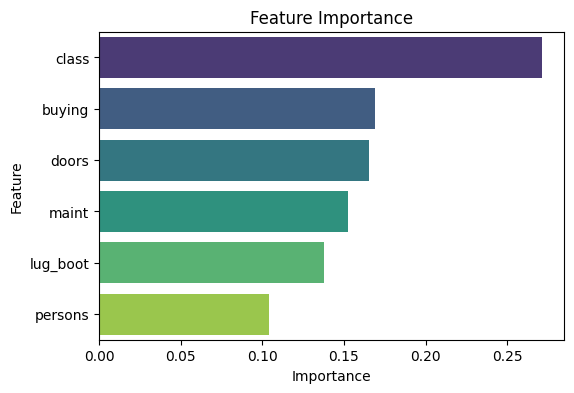

In [26]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature',hue='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance')
plt.show()